In [2]:
from pyforest import *

In [23]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
# Check for missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
# Splitting table on sex column
male_df = train_df[train_df['Sex'] == 'male']
female_df = train_df[train_df['Sex'] == 'female']

In [28]:
male_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          470
Embarked         0
dtype: int64

In [29]:
# Fill missing values in age column with median age
male_df['Age'].fillna(male_df['Age'].median(), inplace=True)
female_df['Age'].fillna(female_df['Age'].median(), inplace=True)

/var/folders/d8/1m0gxlwj51q9xdbltbjg_grm0000gn/T/ipykernel_7030/1171118948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['Age'].fillna(male_df['Age'].median(), inplace=True)
/var/folders/d8/1m0gxlwj51q9xdbltbjg_grm0000gn/T/ipykernel_7030/1171118948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['Age'].fillna(female_df['Age'].median(), inplace=True)


In [30]:
# Joining the two tables back together
df = pd.concat([male_df, female_df])

<IPython.core.display.Javascript object>

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# Extracting numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

<IPython.core.display.Javascript object>

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [34]:
# Checking correlation between numeric columns
df[numeric_cols].corr()

# Arranging columns by correlation with Survived
corr = df[numeric_cols].corr()['Survived'].sort_values(ascending=False)
corr


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.073296
Pclass        -0.338481
Name: Survived, dtype: float64

In [35]:
# Dropping Name column
df.drop('Name', axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S


In [36]:
# Dropping PassengerId column
df.drop('PassengerId', axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,male,29.0,0,0,330877,8.4583,NaN,Q
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
7,0,3,male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,230433,26.0000,NaN,S
882,0,3,female,22.0,0,0,7552,10.5167,NaN,S
885,0,3,female,39.0,0,5,382652,29.1250,NaN,Q
887,1,1,female,19.0,0,0,112053,30.0000,B42,S


In [37]:
# Dropping cabin column
df.drop('Cabin', axis=1, inplace=True)

In [38]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,29.0,0,0,330877,8.4583,Q
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,230433,26.0000,S
882,0,3,female,22.0,0,0,7552,10.5167,S
885,0,3,female,39.0,0,5,382652,29.1250,Q
887,1,1,female,19.0,0,0,112053,30.0000,S


In [39]:
# Checking Siblings/Spouses column
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [40]:
# Extracting numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Checking correlation between numeric columns
df[numeric_cols].corr()

<IPython.core.display.Javascript object>

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.073296,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.338056,0.083081,0.018443,-0.549500
Age,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,0.094161
SibSp,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.176038,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.094161,0.159651,0.216225,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

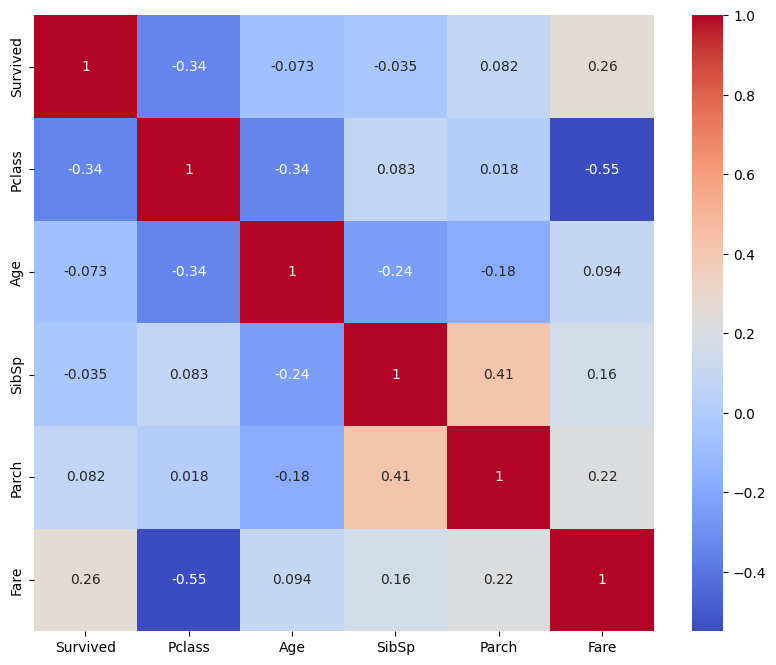

In [41]:
# Heatmap of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()


Highest correlation of Survival is with fare prices

In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,29.0,0,0,330877,8.4583,Q
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,230433,26.0000,S
882,0,3,female,22.0,0,0,7552,10.5167,S
885,0,3,female,39.0,0,5,382652,29.1250,Q
887,1,1,female,19.0,0,0,112053,30.0000,S


In [44]:
# Encoding Embarked and Sex columns
le = LabelEncoder()

df['Embarked'] = le.fit_transform(df['Embarked'])
df['Sex'] = le.fit_transform(df['Sex'])
df

<IPython.core.display.Javascript object>

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,2
4,0,3,1,35.0,0,0,373450,8.0500,2
5,0,3,1,29.0,0,0,330877,8.4583,1
6,0,1,1,54.0,0,0,17463,51.8625,2
7,0,3,1,2.0,3,1,349909,21.0750,2
...,...,...,...,...,...,...,...,...,...
880,1,2,0,25.0,0,1,230433,26.0000,2
882,0,3,0,22.0,0,0,7552,10.5167,2
885,0,3,0,39.0,0,5,382652,29.1250,1
887,1,1,0,19.0,0,0,112053,30.0000,2


In [47]:
# Changing ticket column to numeric
df['Ticket'] = pd.to_numeric(df['Ticket'], errors='coerce')

<IPython.core.display.Javascript object>

In [49]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket      230
Fare          0
Embarked      0
dtype: int64

In [50]:
df['Ticket'].fillna(df['Ticket'].median(), inplace=True)

In [58]:
# Importing GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Building model with different parameters
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

params = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']}

rf = RandomForestClassifier()
grid = GridSearchCV(rf, params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_


{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}

In [59]:
# Building model with best parameters
rf = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

# Importing confusion matrix
from sklearn.metrics import confusion_matrix

# Predicting values
y_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[93, 12],
       [21, 53]])

In [60]:
# Importing classification report
from sklearn.metrics import classification_report

# Classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [61]:
# Predicting values for test data
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

test_df['Embarked'] = le.fit_transform(test_df['Embarked'])


In [62]:
# Changing ticket column to numeric
test_df['Ticket'] = pd.to_numeric(test_df['Ticket'], errors='coerce')
test_df['Ticket'].fillna(test_df['Ticket'].median(), inplace=True)

<IPython.core.display.Javascript object>

In [66]:
test_df['Sex'] = le.fit_transform(test_df['Sex'])

In [64]:
# Dropping columns
test_df.drop(['Name', 'PassengerId', 'Cabin'], axis=1, inplace=True)

In [67]:
# Predicting values
y_pred = rf.predict(test_df)


In [69]:
# Extracting PassengerId column
test2_df = pd.read_csv('test.csv')
PassengerId = test2_df['PassengerId']

# Creating submission file
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred})
submission.to_csv('submission.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>